### Import Libraries

In [13]:
import numpy as  np
import time
import cv2
import os
import glob
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip


In [14]:
weights_path = './yolo/yolov3.weights'
config_path = './yolo/yolov3.cfg'

In [15]:
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [16]:
names = net.getLayerNames()

In [17]:
image_path = './yolo/test2.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

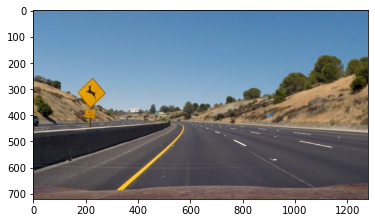

In [18]:
plt.imshow(img)

In [19]:
(H, W) = img.shape[:2]
layers_names = [names[i - 1] for i in net.getUnconnectedOutLayers()]

In [20]:
layers_names

['yolo_82', 'yolo_94', 'yolo_106']

In [21]:
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), crop=False, swapRB=False)
net.setInput(blob)
start_t = time.time()
layers_output = net.forward(layers_names)


In [22]:
boxes = []
confidences = []
classIDs = []

In [23]:
for output in layers_output:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.85:
            box = detection[:4] * np.array([W, H, W, H])
            bx,by,bw,bh = box.astype('int')
            x = int(bx - bw/2)
            y = int(by - bh/2)
            boxes.append([x, y, int(bw), int(bh)])
            confidences.append(confidence)
            classIDs.append(classID)

In [24]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.8, 0.8)
print(type(idxs))
idxs.shape


<class 'tuple'>


AttributeError: 'tuple' object has no attribute 'shape'

In [25]:
labels_path = './yolo/coco.names'
labels = open(labels_path).read().strip().split('\n')

In [26]:
for i in idxs.flatten():
    (x, y) = [boxes[i][0], boxes[i][1]]
    (w, h) = [boxes[i][2], boxes[i][3]]
    cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 2)
    cv2.putText(img, "{}: {}".format(labels[classIDs[i]], confidences[i]), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5\
                , (255, 255, 255), 2)

AttributeError: 'tuple' object has no attribute 'flatten'

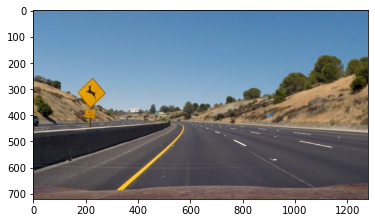

In [27]:
plt.imshow(img)

In [31]:
def detect_cars(img):
    blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), crop=False, swapRB=False)
    net.setInput(blob)
    layers_output = net.forward(layers_names)
    
    boxes = []
    confidences = []
    classIDs = []
    
    for output in layers_output:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            if confidence > 0.80:
                box = detection[:4] * np.array([W, H, W, H])
                bx,by,bw,bh = box.astype('int')
                x = int(bx - bw/2)
                y = int(by - bh/2)
                boxes.append([x, y, int(bw), int(bh)])
                confidences.append(confidence)
                classIDs.append(classID)
    
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.8, 0)
    idxs = np.asarray(idxs)
    
    for count, i in enumerate(idxs.flatten()):
        (x, y) = [boxes[i][0], boxes[i][1]]
        (w, h) = [boxes[i][2], boxes[i][3]]
        cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 2)
        cv2.putText(img, "{} {}: {}%".format(labels[classIDs[i]], count + 1, int(100*confidences[i])), (x, y - 6), cv2.FONT_HERSHEY_SIMPLEX, 0.5\
                    , (255, 255, 255), 1) 
    return img

In [32]:
weights_path = './yolo/yolov3.weights'
config_path = './yolo/yolov3.cfg'
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

def pipeline():

    names = net.getLayerNames()
    layers_names = [names[i - 1] for i in net.getUnconnectedOutLayers()]
    labels_path = './yolo/coco.names'
    labels = open(labels_path).read().strip().split('\n')
    
    
    project_video_path = './yolo/test_videos/challenge_video.mp4'
    project_video_output = './yolo/results/challenge2_video.mp4'

    project_video = VideoFileClip(project_video_path)
    white_clip = project_video.fl_image(detect_cars) #NOTE: this function expects color images!!
    %time white_clip.write_videofile(project_video_output, audio=False)
    

In [33]:
pipeline()

Moviepy - Building video ./yolo/results/challenge2_video.mp4.
Moviepy - Writing video ./yolo/results/challenge2_video.mp4



Moviepy - Done !
Moviepy - video ready ./yolo/results/challenge2_video.mp4
Wall time: 4min 53s


In [ ]:
cv2.cuda.getCudaEnabledDeviceCount()